In [2]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import Quandl
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
import patsy
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)
import urllib2 as url
import statsmodels.api as sm
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


In [3]:
store = pd.read_csv('/Users/jiangzeyu/Dropbox/ADS/data/store.csv')
test = pd.read_csv('/Users/jiangzeyu/Dropbox/ADS/data/test.csv')
sales = pd.read_csv('/Users/jiangzeyu/Dropbox/ADS/data/train.csv', dtype={'StateHoliday': np.character})

In [3]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1,1,0,0
1,2,3,4,2015-09-17,1,1,0,0
2,3,7,4,2015-09-17,1,1,0,0
3,4,8,4,2015-09-17,1,1,0,0
4,5,9,4,2015-09-17,1,1,0,0


In [4]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270,9,2008,0,NaN,NaN,NaN
1,2,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,c,c,620,9,2009,0,NaN,NaN,NaN
4,5,a,a,29910,4,2015,0,NaN,NaN,NaN


In [5]:
sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
print("Sales shape: %s --> columns: %s" % (sales.shape, ", ".join(sales.columns)))
print("Store shape: %s --> columns: %s" % (store.shape, ", ".join(store.columns)))

Sales shape: (1017209, 9) --> columns: Store, DayOfWeek, Date, Sales, Customers, Open, Promo, StateHoliday, SchoolHoliday
Store shape: (1115, 10) --> columns: Store, StoreType, Assortment, CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2, Promo2SinceWeek, Promo2SinceYear, PromoInterval


In [5]:
newdata = pd.merge(sales, store, on='Store')

In [6]:
newdata.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270,9,2008,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270,9,2008,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270,9,2008,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270,9,2008,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270,9,2008,0,NaN,NaN,NaN


In [7]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
Store                        1017209 non-null int64
DayOfWeek                    1017209 non-null int64
Date                         1017209 non-null object
Sales                        1017209 non-null int64
Customers                    1017209 non-null int64
Open                         1017209 non-null int64
Promo                        1017209 non-null int64
StateHoliday                 1017209 non-null object
SchoolHoliday                1017209 non-null int64
StoreType                    1017209 non-null object
Assortment                   1017209 non-null object
CompetitionDistance          1014567 non-null float64
CompetitionOpenSinceMonth    693861 non-null float64
CompetitionOpenSinceYear     693861 non-null float64
Promo2                       1017209 non-null int64
Promo2SinceWeek              509178 non-null float64
Promo2SinceYear              509178 non-null f

In [34]:
ts = newdata.groupby(['Store'])

In [38]:
print len(ts['CompetitionDistance'])

1115


In [39]:
print len(ts['Sales'])

1115


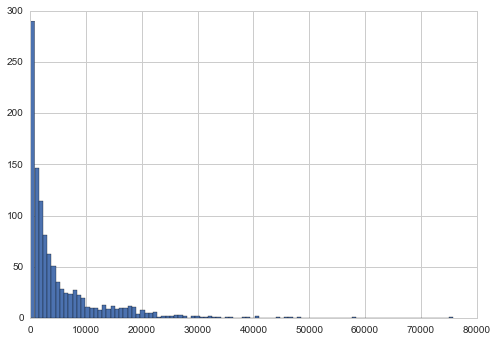

In [8]:
store['CompetitionDistance'].hist(bins=100)

/Users/jiangzeyu/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


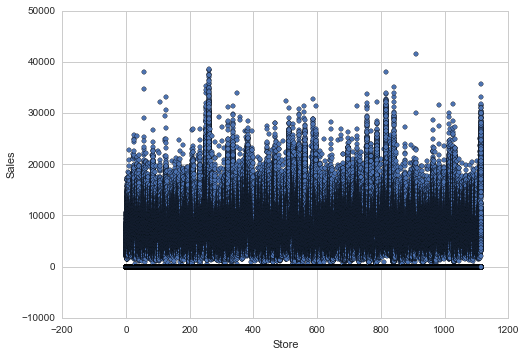

In [9]:
newdata[['Store', 'Sales']].plot(kind='scatter', x='Store', y='Sales')

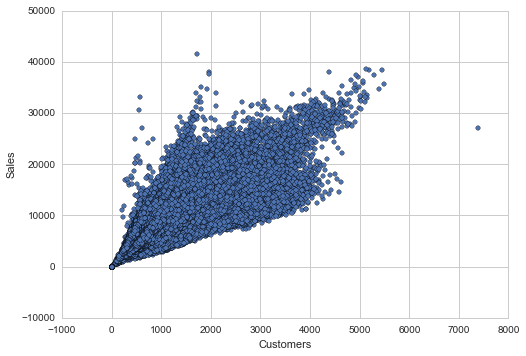

In [10]:
newdata[['Customers', 'Sales']].plot(kind='scatter', x='Customers', y='Sales')

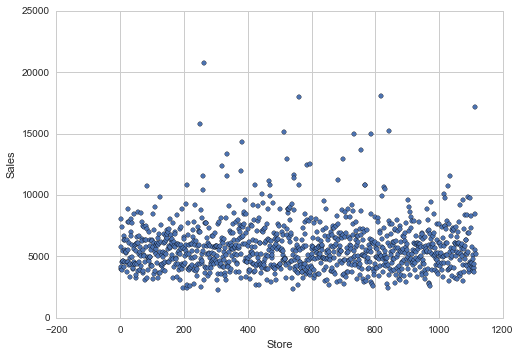

In [11]:
avg_per_store = newdata[['Sales', 'Store']].groupby('Store').mean()
avg_per_store.reset_index().plot(kind='scatter', x='Store', y='Sales')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10bb9eb10>]], dtype=object)

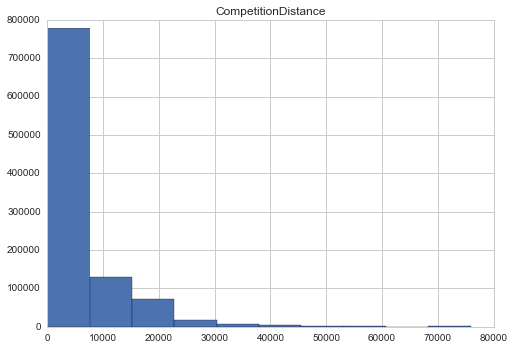

In [12]:
newdata.hist('CompetitionDistance')

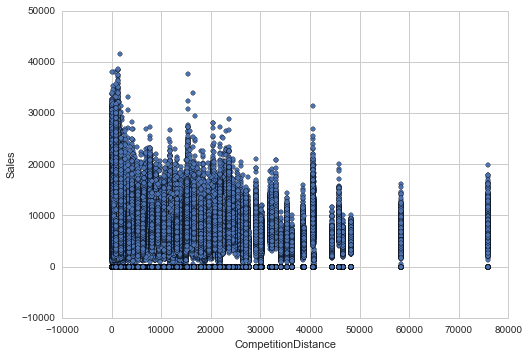

In [13]:
newdata[['CompetitionDistance', 'Sales']].plot(kind='scatter', x='CompetitionDistance', y='Sales')

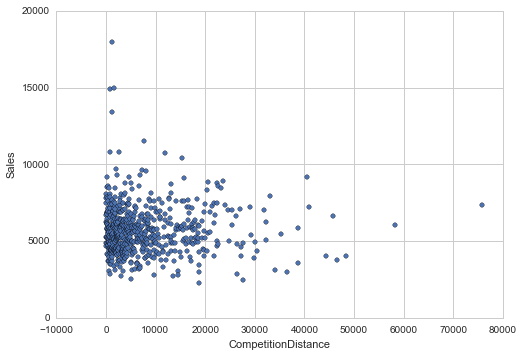

In [14]:
avg_per_com = newdata[['Sales', 'CompetitionDistance']].groupby('CompetitionDistance').mean()
avg_per_com.reset_index().plot(kind='scatter', x='CompetitionDistance', y='Sales')

In [15]:
print avg_per_com

                           Sales
CompetitionDistance             
20                   4861.790870
30                   4659.587470
40                   6212.659448
50                   8072.697452
60                   7816.121373
70                   6667.511268
80                   5269.674098
90                   7494.269184
100                  5271.668790
110                  5800.739576
120                  6841.539991
130                  5775.580999
140                  8535.338995
150                  6445.861227
160                  6219.693206
170                  6174.697718
180                  5179.155748
190                  6917.576306
200                  6117.186837
210                  9186.776008
220                  7890.437367
230                  5259.316048
240                  5818.063057
250                  6857.851349
260                  4863.803235
270                  6732.086518
280                  6108.873202
290                  4167.657313
300       

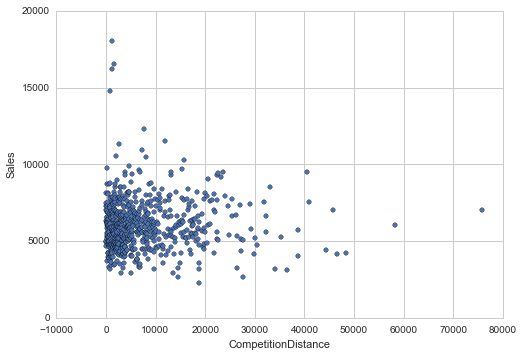

In [57]:
avg_per_com2 = newdata[['Sales', 'CompetitionDistance']].groupby('CompetitionDistance').median()
avg_per_com2.reset_index().plot(kind='scatter', x='CompetitionDistance', y='Sales')

In [58]:
print avg_per_com2

                      Sales
CompetitionDistance        
20                   4909.0
30                   4994.0
40                   6318.0
50                   7256.5
60                   8112.0
70                   7026.0
80                   4650.5
90                   7471.5
100                  5555.5
110                  6246.5
120                  6876.0
130                  5818.5
140                  6990.5
150                  6072.0
160                  6547.5
170                  6247.5
180                  5241.5
190                  6445.5
200                  6556.5
210                  9788.0
220                  8718.0
230                  5383.0
240                  6252.0
250                  6185.0
260                  5106.0
270                  7265.0
280                  6205.0
290                  3702.5
300                  5543.5
310                  4832.5
...                     ...
26130                6687.5
26450                5341.5
26490               

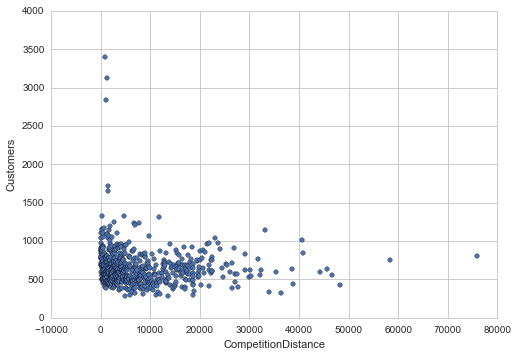

In [92]:
avg_per_com3 = newdata[['Customers', 'CompetitionDistance']].groupby('CompetitionDistance').median()
avg_per_com3.reset_index().plot(kind='scatter', x='CompetitionDistance', y='Customers')

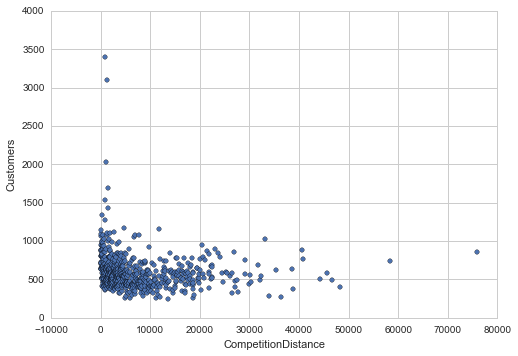

In [93]:
avg_per_com4 = newdata[['Customers', 'CompetitionDistance']].groupby('CompetitionDistance').mean()
avg_per_com4.reset_index().plot(kind='scatter', x='CompetitionDistance', y='Customers')

In [88]:
competition= newdata[['Sales', 'Customers']].groupby(newdata['CompetitionDistance'])
competition_avg = competition.mean()

In [89]:
print competition_avg

                           Sales    Customers
CompetitionDistance                          
20                   4861.790870   628.945860
30                   4659.587470   638.259358
40                   6212.659448   803.517622
50                   8072.697452  1059.828822
60                   7816.121373   945.293701
70                   6667.511268   809.827000
80                   5269.674098   650.035740
90                   7494.269184  1092.755384
100                  5271.668790   697.416561
110                  5800.739576   720.380761
120                  6841.539991   885.478568
130                  5775.580999   711.751703
140                  8535.338995  1139.136589
150                  6445.861227   869.816094
160                  6219.693206   717.879512
170                  6174.697718   884.223726
180                  5179.155748   635.710494
190                  6917.576306   885.549238
200                  6117.186837   797.031051
210                  9186.776008  

In [91]:
competition_med = competition.median()
print competition_med

                      Sales  Customers
CompetitionDistance                   
20                   4909.0      692.5
30                   4994.0      718.0
40                   6318.0      843.0
50                   7256.5      915.5
60                   8112.0     1043.0
70                   7026.0      876.5
80                   4650.5      600.5
90                   7471.5     1104.0
100                  5555.5      777.0
110                  6246.5      809.0
120                  6876.0      877.0
130                  5818.5      777.0
140                  6990.5      970.0
150                  6072.0      775.0
160                  6547.5      797.5
170                  6247.5      897.0
180                  5241.5      688.0
190                  6445.5      825.0
200                  6556.5      880.0
210                  9788.0     1323.0
220                  8718.0     1162.0
230                  5383.0      754.0
240                  6252.0      768.0
250                  6185